# Métodos para mejorar el aprendizaje de nuestra red

<img src="images/mejora_aprendizaje_red.png" alt="Drawing" style="width: 700px;"/>

# 1. Haciendo foco en la data que tenemos

### 1.1 - Recolectar mas datos

<img src="images/more_data.png" alt="Drawing" style="width: 700px;"/>

### 1.2 - Data augmentation

<img src="images/data_augmentation.png" alt="Drawing" style="width: 700px;"/>

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets
import torchvision
import random
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import PIL

In [50]:
RANDOM_SEED = 123
BATCH_SIZE = 64
NUM_EPOCHS = 50


training_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.RandomCrop(size=(28, 28)),
    torchvision.transforms.RandomRotation(degrees=45, interpolation=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.CenterCrop(size=(28, 28)),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

# https://pytorch.org/docs/stable/torchvision/transforms.html

train_dataset = datasets.FashionMNIST(root='data', 
                               train=True, 
                               transform=training_transforms,
                               download=True)

test_dataset = datasets.FashionMNIST(root='data', 
                              train=False, 
                              transform=test_transforms)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


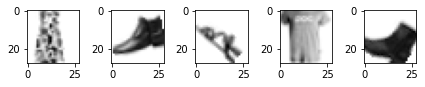

In [51]:
random.seed(123)
torch.manual_seed(123)


for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

In [52]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               RandomCrop(size=(28, 28), padding=None)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=bilinear, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


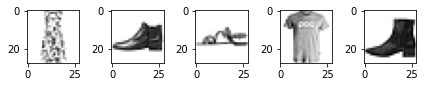

In [40]:
# comparar sin data augmentation

train_dataset = datasets.FashionMNIST(root='data', 
                               train=True, 
                               transform=torchvision.transforms.ToTensor(),
                               download=True)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

torch.manual_seed(0)
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    
plt.tight_layout()

# 2. Foco en la complejidad del modelo

<img src="images/complejidad_model.png" alt="Drawing" style="width: 500px;"/>

# 3. Early stopping

### Punto 1: Split de dataset

<img src="images/data_split.png" alt="Drawing" style="width: 600px;"/>

- Usar dataset de validación para tuning de hiperparámetros.
- Usar dataset de test para validar la generalización del modelo (una vez entrenado el modelo).

### Punto 2: Early stop

<img src="images/early_stop.jpeg" alt="Drawing" style="width: 700px;"/>

**Ver notebook early stop**

# 4. Dropout

* Desactivar aleatoriamente ciertas (probabilidad) neuronas.
* Solo se desactivan durante el entrenamiento.
* Dependen de una probabilidad p

<img src="images/dropout.png" alt="Drawing" style="width: 700px;"/>

### Implementacion: Ejercicio de TP

# L1 y L2

* Imponer penalidades sobre los parámetros

* **L1:** agregar suma de todos los valores absolutos de los pesos multiplicados por una constante, a la funcion de coste.

<img src="images/l1_reg.png" alt="Drawing" style="width: 400px;"/>

* **L2:** ahora sumamos la suma de las normas al cuadrado de los pesos lo multiplicamos por una constante. Util para aprender mas complejidad.

<img src="images/l2_regula.png" alt="Drawing" style="width: 400px;"/>